# Project - Part A: Airbnb Price Prediction and Insights

## 1. Overview 


This project aims to develop a machine learning model capable of predicting the price of Airbnb listings. Effective pricing is crucial for property owners to maximize their revenue while remaining competitive. By analyzing various features of a listing, such as its property type, room type, location, amenities, and host characteristics, this project will provide actionable insights to Airbnb hosts, enabling them to optimize their listing prices.

## 2. Problem Statement

The primary objective of this project is to develop a regression model that accurately predicts the log_price (log-transformed price) of an Airbnb listing. The model will utilize a diverse set of features including property_type, room_type, number_of_reviews, latitude, longitude, amenities, and various host characteristics. The insights derived from this analysis will help Airbnb hosts understand the key drivers of price, enabling them to make data-driven decisions for pricing their properties. Additionally, the project will aid Airbnb in refining its recommendations for pricing, ultimately improving host and guest satisfaction.

## 3. Dataset Information

Dataset: Airbnb_data 

* DATASET DICTIONARY
   | Variable                 | Description                                                | Type          | Unit       |
| ------------------------ | ---------------------------------------------------------- | ------------- | ---------- |
| `id`                     | Unique identifier for the listing                          | String        | -          |
| `log_price`              | Log-transformed price of the listing                       | Float         | -          |
| `property_type`          | Type of property (e.g., Apartment, House)                  | String        | -          |
| `room_type`              | Type of room offered (e.g., Entire home/apt, Private room) | String        | -          |
| `amenities`              | List of amenities available at the property                | String        | -          |
| `accommodates`           | Number of guests the property can accommodate              | Integer       | People     |
| `bathrooms`              | Number of bathrooms in the listing                         | Integer/Float | -          |
| `bed_type`               | Type of bed provided (e.g., Real Bed, Futon)               | String        | -          |
| `cancellation_policy`    | Cancellation policy of the host (e.g., Moderate, Strict)   | String        | -          |
| `cleaning_fee`           | Indicates if a cleaning fee is charged                     | Boolean       | -          |
| `city`                   | City where the property is located                         | String        | -          |
| `description`            | Description of the property provided by the host           | String        | -          |
| `first_review`           | Date of the first review for the listing                   | Date          | DD-MM-YYYY |
| `host_has_profile_pic`   | Indicates if the host has a profile picture                | Boolean       | -          |
| `host_identity_verified` | Indicates if the host's identity is verified               | Boolean       | -          |
| `host_response_rate`     | Host's response rate (e.g., 100%)                          | String        | Percentage |
| `host_since`             | Date when the host joined Airbnb                           | Date          | DD-MM-YYYY |
| `instant_bookable`       | Indicates if the listing can be booked instantly           | Boolean       | -          |
| `last_review`            | Date of the most recent review for the listing             | Date          | DD-MM-YYYY |
| `latitude`               | Latitude coordinate of the listing's location              | Float         | Degrees    |
| `longitude`              | Longitude coordinate of the listing's location             | Float         | Degrees    |
| `name`                   | Name/title of the listing                                  | String        | -          |
| `neighbourhood`          | Neighborhood where the listing is located                  | String        | -          |
| `number_of_reviews`      | Total number of reviews the listing has received           | Integer       | -          |
| `review_scores_rating`   | Average review score for the listing                       | Float         | -          |
| `thumbnail_url`          | URL for the thumbnail image of the listing (may be empty)  | String        | -          |
| `zipcode`                | Zip code of the property's location                        | String        | -          |
| `bedrooms`               | Number of bedrooms in the listing                          | Integer       | -          |
| `beds`                   | Number of beds in the listing                              | Integer       | -          |


## 4. Deliverable

### 1. Data Exploration and preprocessing

This phase involves understanding the dataset, handling inconsistencies, and transforming features into a format suitable for machine learning models.

Key Steps:

* Loading Data: Reading the raw data into a pandas DataFrame.

* Initial Inspection: Checking data types, identifying non-numeric columns, and getting a quick statistical summary.

* Handling Missing Values: Strategically addressing NaN (Not a Number) entries. Different approaches apply based on variable type and missingness patterns.

* Data Cleaning & Type Conversion: Correcting inconsistent data formats and converting columns to their appropriate data types (e.g., strings to booleans, dates to datetime objects, percentages to floats).

* Feature Engineering: Creating new, more informative features from existing ones to enhance the model's predictive power.

* Outlier Treatment: Identifying and managing extreme values that could disproportionately affect model training.

* Categorical Encoding: Converting categorical (textual) features into a numerical format that machine learning algorithms can understand.

#### Importing Libraries

In [13]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder # For numerical scaling and categorical encoding
from sklearn.compose import ColumnTransformer # For applying different transformers to different columns
from sklearn.impute import SimpleImputer # For handling missing values
from datetime import datetime
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import xgboost as xgb
import warnings

#### Loading the Dataset

In [15]:
df = pd.read_excel("Airbnb_data.xlsx")

#### Data Inspection

In [17]:
print("--- First 5 rows of the dataset ---") dddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddd # A quick overview of the data structure
print(df.head())

print("\n--- Dataset Information ---") # Useful for Missing data
df.info()

print("\n--- Descriptive Statistics for Numerical Columns ---") # Useful for understanding data distribution, ranges, and potential outliers.
print(df.describe())

--- First 5 rows of the dataset ---
         id  log_price property_type        room_type  \
0   6901257   5.010635     Apartment  Entire home/apt   
1   6304928   5.129899     Apartment  Entire home/apt   
2   7919400   4.976734     Apartment  Entire home/apt   
3  13418779   6.620073         House  Entire home/apt   
4   3808709   4.744932     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
3  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   

   bed_type cancellation_policy  cleaning_fee  ...   latitude   longitude  \
0  Real Bed              strict          True  ...  40.69

#### * Data Cleaning & Type Conversion

In [19]:
# Conversion of boolean-like string representations to actual Boolean types (e.g., 't'/'f', 'TRUE'/'FALSE').
bool_map = {'t': True, 'f': False, 'TRUE': True, 'FALSE': False}
for col in ['cleaning_fee', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable']:
    if col in df.columns:
        df[col] = df[col].map(bool_map)
        df[col] = df[col].fillna(False)


# Convert percentage strings to numerical floating-point values (e.g., '100%' to 1.0).
if 'host_response_rate' in df.columns:
    # Converting the column to string type first to ensure .str accessor works,
    # handling potential mixed types or NaNs that might interfere.
    # Replacing non-numeric representations (like 'N/A') with NaN before converting to numeric.
    df['host_response_rate'] = df['host_response_rate'].astype(str).str.replace('%', '', regex=False)
    # Convert to numeric, coercing errors to NaN. This handles cases like 'N/A' or truly non-numeric entries.
    df['host_response_rate'] = pd.to_numeric(df['host_response_rate'], errors='coerce') / 100
    # Fill missing host_response_rate with 0 or median (assuming 0 if no response rate recorded)
    df['host_response_rate'] = df['host_response_rate'].fillna(0)


# Conversion of date-related columns to datetime objects.
# This transformation facilitates subsequent date-based computations, such as calculating host tenure or review recency.
# The 'errors='coerce'' parameter ensures that any unparseable date strings are converted to NaT (Not a Time), preventing errors.
for col in ['first_review', 'host_since', 'last_review']:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

C:\Users\nayan\AppData\Local\Temp\ipykernel_13368\271787902.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(False)
C:\Users\nayan\AppData\Local\Temp\ipykernel_13368\271787902.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(False)
C:\Users\nayan\AppData\Local\Temp\ipykernel_13368\271787902.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, 

#### * Handling Missing Values 

In [21]:
# Following the initial data cleaning, residual missing values (NaN) are addressed systematically.

print("\n--- Count of Missing Values per Column (Post-Initial Cleaning) ---")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Imputation Strategy based on Data Dictionary and Conventional Practices:
# - `bathrooms`, `bedrooms`, `beds`: These numerical count-based variables are imputed with their median values,
#   as the median is robust to the influence of outliers.
# - `review_scores_rating`: This numerical rating is imputed with its median value. It is often logically consistent
#   to assume that if `number_of_reviews` is zero, then `review_scores_rating` would be missing.
# - `first_review`, `last_review`: If these date fields are missing, it typically implies an absence of reviews,
#   correlating with a `number_of_reviews` value of zero. For computational purposes, these are imputed with the
#   `host_since` date, thereby enabling the derivation of features like 'days_since_last_review'.
# - `description`, `name`, `thumbnail_url`, `zipcode`, `city`, `neighbourhood`: These categorical/textual fields
#   are imputed with a placeholder string 'Unknown'. High-cardinality nominal variables like `zipcode`, `city`,
#   and `neighbourhood` may require more sophisticated handling or potential exclusion if too sparse.

# Numerical Imputation (Median-based imputation for robustness against outliers).
numerical_impute_median = ['bathrooms', 'bedrooms', 'beds', 'review_scores_rating']
for col in numerical_impute_median:
    if col in df.columns and df[col].isnull().any():
        df[col] = df[col].fillna(df[col].median())
        print(f"Missing values in '{col}' have been imputed with the median value: {df[col].median():.2f}")

# Date Imputation for 'first_review' and 'last_review'.
if 'first_review' in df.columns:
    df['first_review'] = df['first_review'].fillna(df['host_since'])
if 'last_review' in df.columns:
    df['last_review'] = df['last_review'].fillna(df['host_since'])

# Handling missing string/text values: Imputation with 'Unknown'.
text_cols_to_fill = ['description', 'name', 'thumbnail_url', 'zipcode', 'city', 'neighbourhood']
for col in text_cols_to_fill:
    if col in df.columns and df[col].isnull().any():
        df[col] = df[col].fillna('Unknown')
        print(f"Missing values in '{col}' have been imputed with 'Unknown'.")


--- Count of Missing Values per Column (Post-Initial Cleaning) ---
bathrooms                 200
description                 6
first_review            15864
host_since                188
last_review             15827
name                       10
neighbourhood            6872
review_scores_rating    16722
thumbnail_url            8216
zipcode                   968
bedrooms                   91
beds                      131
dtype: int64
Missing values in 'bathrooms' have been imputed with the median value: 1.00
Missing values in 'bedrooms' have been imputed with the median value: 1.00
Missing values in 'beds' have been imputed with the median value: 1.00
Missing values in 'review_scores_rating' have been imputed with the median value: 96.00
Missing values in 'description' have been imputed with 'Unknown'.
Missing values in 'name' have been imputed with 'Unknown'.
Missing values in 'thumbnail_url' have been imputed with 'Unknown'.
Missing values in 'zipcode' have been imputed with 'Unkn

#### * Feature Engineering

In [23]:
# Calculation of Number of Amenities
# Term: .apply(lambda x: len(x.split(','))) - Applies a lambda function that tokenizes the string by commas and counts the resulting parts.
# Explanation: This operation generates a new numerical feature, 'num_amenities', by quantifying the number of distinct amenities listed in the 'amenities' string.
if 'amenities' in df.columns:
    df['num_amenities'] = df['amenities'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)
    print("\n'num_amenities' feature has been engineered.")

# Calculation of Host Experience in Years
# Term: (datetime.now() - df['host_since']).dt.days / 365.25 - Computes the temporal difference in days and converts it into years.
# Explanation: A new numerical feature, 'host_experience_years', is derived to represent the duration (in years) for which the host has been active on Airbnb.
# Missing values (e.g., if 'host_since' was NaT) are imputed with 0, and extreme values are capped to a maximum of 50 years to mitigate outlier impact.
if 'host_since' in df.columns:
    df['host_experience_years'] = (datetime.now() - df['host_since']).dt.days / 365.25
    df['host_experience_years'] = df['host_experience_years'].fillna(0)
    df['host_experience_years'] = np.clip(df['host_experience_years'], 0, 50)
    print("'host_experience_years' feature has been engineered.")

# Calculation of Days Since Last Review / Review Recency
# Explanation: This feature quantifies the time elapsed since the most recent review for a listing,
# serving as an indicator of listing activity and recent popularity. Missing values are filled with
# the maximum observed value, implying a very old or unreviewed listing, and values are capped at 5 years.
if 'last_review' in df.columns:
    df['days_since_last_review'] = (datetime.now() - df['last_review']).dt.days
    df['days_since_last_review'] = df['days_since_last_review'].fillna(df['days_since_last_review'].max())
    df['days_since_last_review'] = np.clip(df['days_since_last_review'], 0, 365 * 5)
    print("'days_since_last_review' feature has been engineered.")

# Management of Location Features (e.g., `zipcode` cardinality)
# While `latitude` and `longitude` provide precise geographical data, granular features like `zipcode`
# or `city`/`neighbourhood` can be problematic if they exhibit high cardinality (too many unique values).
# For features with an excessive number of unique values (e.g., >500 unique zipcodes), direct one-hot encoding
# is often impractical due to sparsity and computational burden. Such columns are typically excluded or require
# more advanced encoding techniques.
if 'zipcode' in df.columns and df['zipcode'].nunique() > 500:
    print("The 'zipcode' column has high cardinality and has been excluded from direct encoding.")
    df = df.drop('zipcode', axis=1)

# Exclusion of Identifier, Redundant, or Non-Predictive Columns.
# Term: .drop(columns, axis=1) - This method removes specified columns from the DataFrame along axis 1 (column-wise).
# Explanation: Columns such as 'id' (unique identifier), 'description' and 'name' (raw text, often not directly useful),
# 'thumbnail_url' (external URL), and original date/amenity columns (`first_review`, `host_since`, `last_review`, `amenities`)
# that have been utilized for feature engineering are removed to streamline the dataset and avoid redundancy.
columns_to_drop = ['id', 'description', 'name', 'thumbnail_url', 'amenities', 'first_review', 'host_since', 'last_review']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], axis=1)
print("\nNon-essential columns have been systematically removed.")


'num_amenities' feature has been engineered.
'host_experience_years' feature has been engineered.
'days_since_last_review' feature has been engineered.
The 'zipcode' column has high cardinality and has been excluded from direct encoding.

Non-essential columns have been systematically removed.


### * Outlier Treatment

In [25]:
# The target variable `log_price` is already log-transformed, which inherently mitigates the impact of extreme price outliers.
# For other numerical features, explicit outlier treatment (e.g., capping or winsorization based on IQR) can be applied.
# In this implementation, a simplified approach involves clipping values to plausible bounds for features such as
# 'accommodates' and 'number_of_reviews' to manage potential outliers.

# Clipping 'accommodates' to a reasonable upper bound (e.g., 1 to 16 guests).
if 'accommodates' in df.columns:
    df['accommodates'] = np.clip(df['accommodates'], 1, 16)
    print("'accommodates' values have been capped within a reasonable range.")

# Clipping 'number_of_reviews' to a reasonable upper bound (e.g., 0 to 500 reviews).
if 'number_of_reviews' in df.columns:
    df['number_of_reviews'] = np.clip(df['number_of_reviews'], 0, 500)
    print("Capped 'number_of_reviews' values.")

'accommodates' values have been capped within a reasonable range.
Capped 'number_of_reviews' values.


### * Categorical Encoding

In [27]:
# --- Feature Transformation Pipeline (One-Hot Encoding and Numerical Scaling) ---
# Identification and transformation of remaining string-type categorical columns into numerical representations.
# Term: .select_dtypes(include='object') - This method selects columns whose data type is 'object', typically denoting string categories.
# Explanation: This facilitates the automatic identification of all categorical features requiring encoding.
categorical_features = df.select_dtypes(include='object').columns.tolist()

# Identification of numerical features that require scaling.
# These are the numerical columns that remain after dropping and feature engineering.
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
# Ensure the target variable 'log_price' is NOT included in numerical features for scaling, as it is separated later.
if 'log_price' in numerical_features:
    numerical_features.remove('log_price')

# Management of High-Cardinality Categorical Features ('city', 'neighbourhood').
# High cardinality can lead to an excessive number of dummy variables upon one-hot encoding, resulting in data sparsity
# and increased computational burden during model training. A typical threshold for high cardinality is 50-100 unique values.
# Columns exceeding this threshold are either dropped or flagged for more advanced encoding techniques (not implemented here).
high_cardinality_threshold = 100
for col in ['city', 'neighbourhood']:
    if col in categorical_features and df[col].nunique() > high_cardinality_threshold:
        print(f"Warning: The column '{col}' exhibits {df[col].nunique()} unique values, indicating high cardinality. This column has been excluded from direct one-hot encoding and dropped for simplicity.")
        categorical_features.remove(col)
        df = df.drop(col, axis=1) # Drop from DataFrame if high cardinality
        # Also remove from numerical_features if it somehow got there after conversion errors or other issues
        if col in numerical_features:
            numerical_features.remove(col)


# Definition of the ColumnTransformer.
# Term: ColumnTransformer - A scikit-learn tool that applies different transformers to different columns of an array or DataFrame.
# Explanation: This preprocessor now combines both One-Hot Encoding for categorical features and StandardScaler for numerical features
# into a single, cohesive transformation step. The 'remainder="drop"' parameter ensures that any columns not explicitly
# specified in a transformer are dropped from the output, leading to a cleaner and more focused feature set.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features), # Apply StandardScaler to numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features) # Apply OneHotEncoder to categorical features
    ],
    remainder='drop' # Any columns not specified will be dropped.
)

# Application of Data Transformations.
# Initially, features (X) and the target variable (y) are separated.
X = df.drop('log_price', axis=1) # Features (independent variables).
y = df['log_price'] # Target variable (dependent variable).

print(f"\nFeatures prior to transformation pipeline: {X.columns.tolist()}")
# The preprocessor is fitted to the features (X) and then used to transform them.
# Term: .fit_transform() - This method first fits the transformer(s) to the data (learns unique categories, scaling parameters)
#                         and then transforms the data.
# Explanation: This single step applies both One-Hot Encoding and Numerical Scaling simultaneously to the respective columns.
X_processed = preprocessor.fit_transform(X)

# Retrieval of feature names subsequent to all transformations.
# Term: preprocessor.get_feature_names_out() - This method retrieves the names of the features after transformation by the ColumnTransformer.
# Explanation: This is essential for reconstructing the DataFrame with meaningful column names after OneHotEncoder creates new columns
# and StandardScaler passes numerical features through with their original names.
new_feature_names = preprocessor.get_feature_names_out()
X_processed_df = pd.DataFrame(X_processed, columns=new_feature_names, index=X.index)

print(f"\nFeatures following integrated preprocessing pipeline: {X_processed_df.columns.tolist()}")
print(f"Shape of processed features DataFrame: {X_processed_df.shape}")

print("\n--- Initial 5 Rows of Features After Complete Preprocessing (Integrated Pipeline) ---")
print(X_processed_df.head())
print(f"\nDimensions of the final preprocessed features DataFrame: {X_processed_df.shape}")



Features prior to transformation pipeline: ['property_type', 'room_type', 'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city', 'host_has_profile_pic', 'host_identity_verified', 'host_response_rate', 'instant_bookable', 'latitude', 'longitude', 'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds', 'num_amenities', 'host_experience_years', 'days_since_last_review']

Features following integrated preprocessing pipeline: ['num__accommodates', 'num__bathrooms', 'num__host_response_rate', 'num__latitude', 'num__longitude', 'num__number_of_reviews', 'num__review_scores_rating', 'num__bedrooms', 'num__beds', 'num__num_amenities', 'num__host_experience_years', 'num__days_since_last_review', 'cat__property_type_Apartment', 'cat__property_type_Bed & Breakfast', 'cat__property_type_Boat', 'cat__property_type_Boutique hotel', 'cat__property_type_Bungalow', 'cat__property_type_Cabin', 'cat__property_type_Camper/RV', 'cat__property_type_Casa particular',

### Model Development:

In [29]:
# Import necessary libraries for model development.
from sklearn.model_selection import train_test_split  # For partitioning data into subsets.
from sklearn.linear_model import LinearRegression  # A foundational linear regression model.
from sklearn.ensemble import RandomForestRegressor  # A powerful ensemble model based on decision trees.
import xgboost as xgb  # A highly efficient gradient boosting library.
import pandas as pd # Ensure pandas is imported for DataFrame operations.
import numpy as np # Ensure numpy is imported for numerical operations.

# It is presupposed that `X_processed_df` (representing the preprocessed features) and `y` (denoting the target variable 'log_price')
# have been successfully generated and are accessible from the preceding data preprocessing phase.

# --- 1. Data Splitting (Training, Validation, and Test Sets) ---
# train_test_split() - A function from scikit-learn that partitions arrays or matrices into random train and test subsets.
# The dataset is initially divided into a training+validation set (80%) and a final, unseen test set (20%).
# Subsequently, the training+validation set is further partitioned into a dedicated training set (75% of X_train_val)
# and a validation set (25% of X_train_val). This hierarchical splitting ensures robust model evaluation and
# hyperparameter tuning without contaminating the final test set.
# The parameter `random_state=42` is herein stipulated to ensure the deterministic reproducibility of these data partitions.

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_processed_df, y, test_size=0.2, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42
) # Note: 0.25 of 0.8 (X_train_val) results in a 0.2 split for validation data.

print(f"Dimensions of Training Set (X_train): {X_train.shape}")
print(f"Dimensions of Training Target (y_train): {y_train.shape}")
print(f"Dimensions of Validation Set (X_val): {X_val.shape}")
print(f"Dimensions of Validation Target (y_val): {y_val.shape}")
print(f"Dimensions of Test Set (X_test): {X_test.shape}")
print(f"Dimensions of Test Target (y_test): {y_test.shape}")

# --- 2. Model Selection and Training (Example: XGBoost Regressor) ---
# Guidelines recommend experimenting with various models and diligently tuning their hyperparameters.
# XGBoost is widely acknowledged as a robust contender for regression tasks, known for its performance and efficiency.

# Term: xgb.XGBRegressor() - An implementation of the gradient boosting algorithm.
# Explanation: The XGBoost model is initialized. Hyperparameters such as 'n_estimators' (representing the number of boosting rounds or trees)
# and 'learning_rate' (controlling the step size shrinkage to prevent overfitting) are defined. These parameters are subject to
# further optimization through hyperparameter tuning methods.
print("\n--- Training the XGBoost Model ---")
model_xgb = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model_xgb.fit(X_train, y_train)
print("XGBoost Model training has been successfully completed.")

# --- Additional Model Examples for Comparative Analysis ---
# These models are provided as alternatives for potential experimentation and performance comparison.

# Term: LinearRegression() - A simple linear model for regression.
# Explanation: Initializes and trains a standard Linear Regression model.
print("\n--- Training the Linear Regression Model ---")
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
print("Linear Regression Model training has been successfully completed.")

# Term: RandomForestRegressor() - An ensemble learning method for regression, constructing multiple decision trees.
# Explanation: Initializes and trains a RandomForestRegressor. 'n_estimators' defines the number of trees in the forest.
# 'n_jobs=-1' leverages all available CPU cores for parallel processing, accelerating training.
print("\n--- Training the Random Forest Regressor Model ---")
model_rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model_rf.fit(X_train, y_train)
print("Random Forest Regressor Model training has been successfully completed.")


Dimensions of Training Set (X_train): (44466, 66)
Dimensions of Training Target (y_train): (44466,)
Dimensions of Validation Set (X_val): (14822, 66)
Dimensions of Validation Target (y_val): (14822,)
Dimensions of Test Set (X_test): (14823, 66)
Dimensions of Test Target (y_test): (14823,)

--- Training the XGBoost Model ---
XGBoost Model training has been successfully completed.

--- Training the Linear Regression Model ---
Linear Regression Model training has been successfully completed.

--- Training the Random Forest Regressor Model ---
Random Forest Regressor Model training has been successfully completed.


### 3. Model Evaluation:


--- Performance Metrics for XGBoost Regressor on Test Set ---
Test RMSE: 0.3889
Test MAE: 0.2826
Test R-squared: 0.7056

--- Performance Metrics for Linear Regression on Test Set ---
Test RMSE: 0.4626
Test MAE: 0.3485
Test R-squared: 0.5835

--- Performance Metrics for Random Forest Regressor on Test Set ---
Test RMSE: 0.3929
Test MAE: 0.2828
Test R-squared: 0.6996

--- Comparative Summary of Model Performance on Test Set ---
                           RMSE     MAE  R-squared
Model                                             
XGBoost Regressor        0.3889  0.2826     0.7056
Linear Regression        0.4626  0.3485     0.5835
Random Forest Regressor  0.3929  0.2828     0.6996

--- Feature Importance Analysis ---

Top 10 Feature Importances (XGBoost Regressor):
cat__room_type_Entire home/apt    0.757789
num__bathrooms                    0.048661
cat__city_LA                      0.024423
num__bedrooms                     0.023850
num__accommodates                 0.016001
cat__room_typ

C:\Users\nayan\AppData\Local\Temp\ipykernel_13368\4131412425.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importances_xgb.head(10).values,


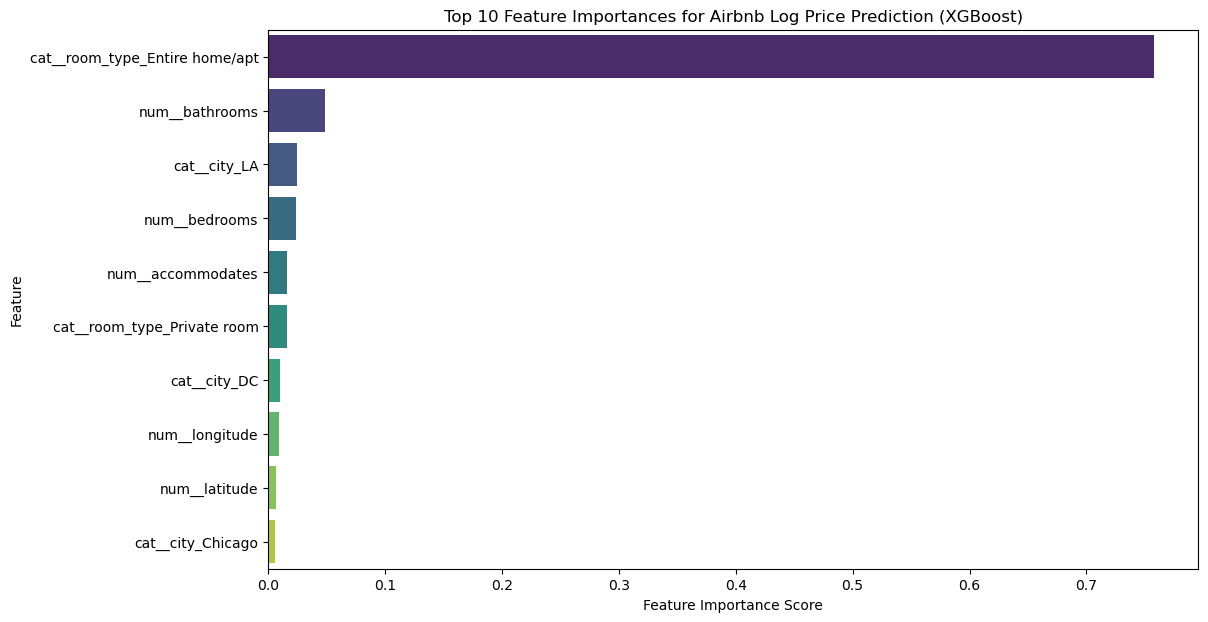


Top 10 Absolute Feature Coefficients (Linear Regression):
cat__city_SF                   -29.971938
cat__city_LA                   -25.902349
num__longitude                 -21.552596
cat__city_Boston                20.183432
cat__city_NYC                   17.498304
cat__city_DC                    14.712631
cat__city_Chicago                3.479921
cat__property_type_Island        0.814536
cat__property_type_Hostel       -0.627380
cat__property_type_Treehouse    -0.535508
dtype: float64


C:\Users\nayan\AppData\Local\Temp\ipykernel_13368\4131412425.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_coefficients_linear.loc[sorted_coefficients_linear.head(10).index].values,


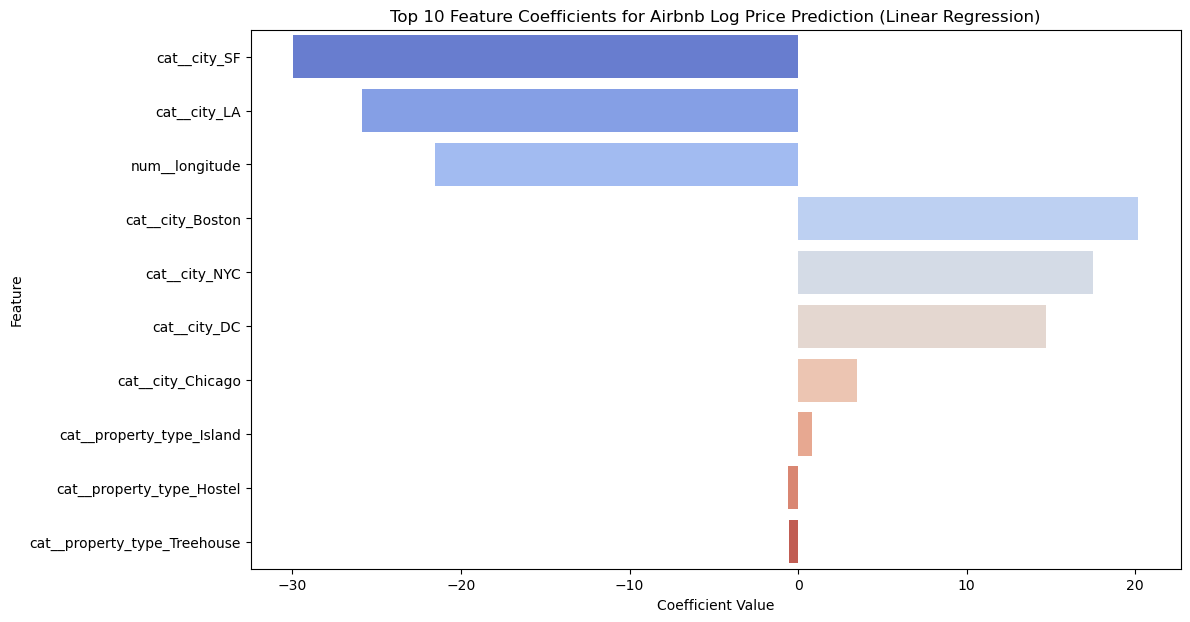


Top 10 Feature Importances (Random Forest Regressor):
cat__room_type_Entire home/apt    0.363814
num__longitude                    0.121797
num__bathrooms                    0.114194
num__latitude                     0.109350
num__host_experience_years        0.050302
num__num_amenities                0.039685
num__number_of_reviews            0.036441
num__accommodates                 0.033202
num__bedrooms                     0.032442
num__review_scores_rating         0.018644
dtype: float64


C:\Users\nayan\AppData\Local\Temp\ipykernel_13368\4131412425.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importances_rf.head(10).values,


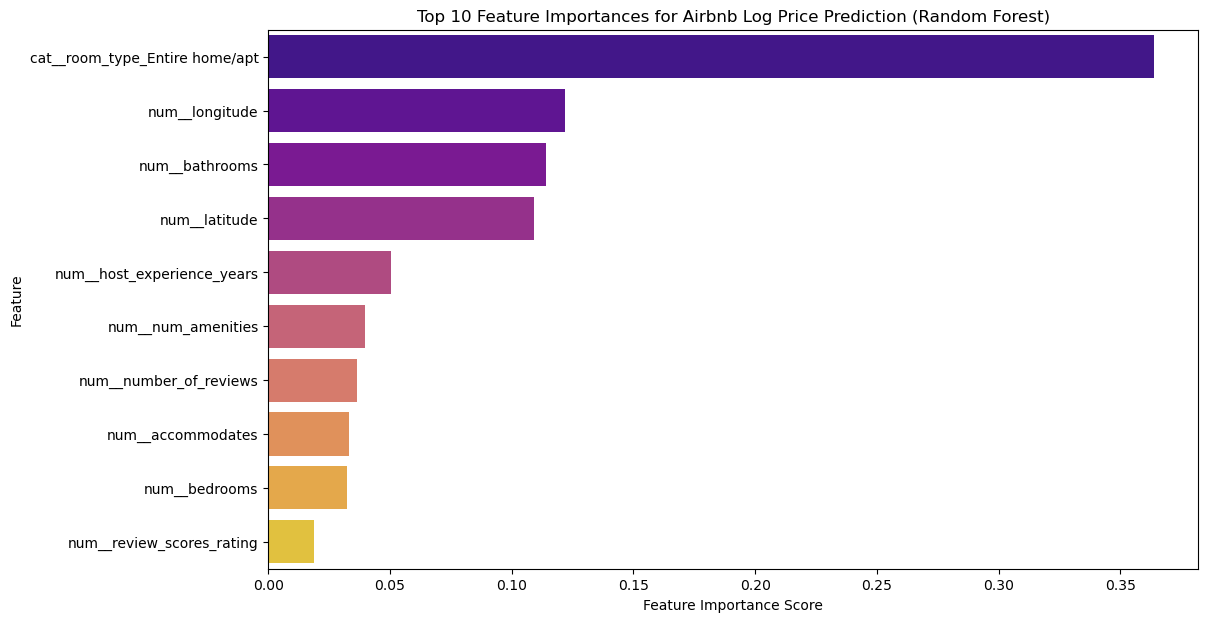

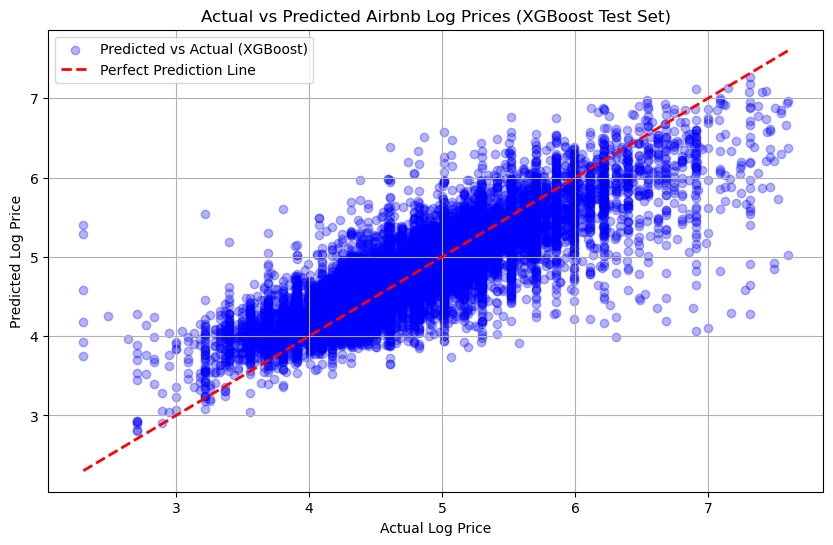

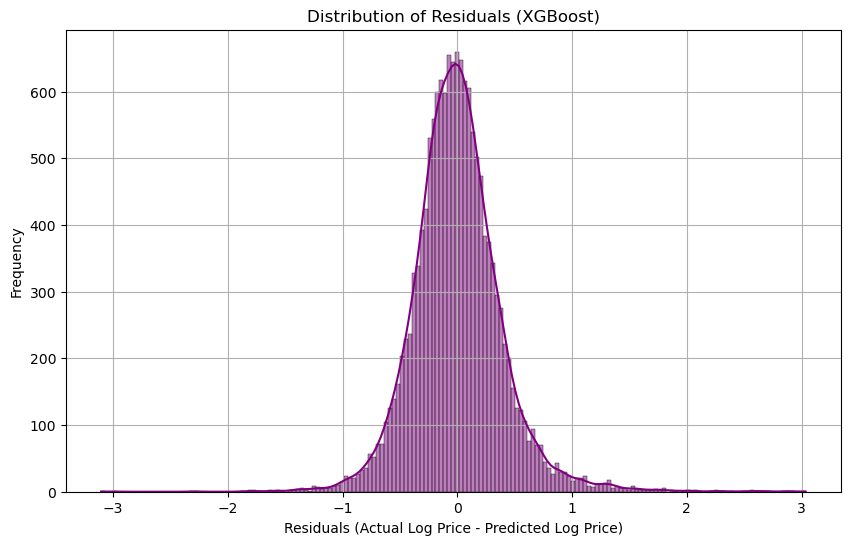

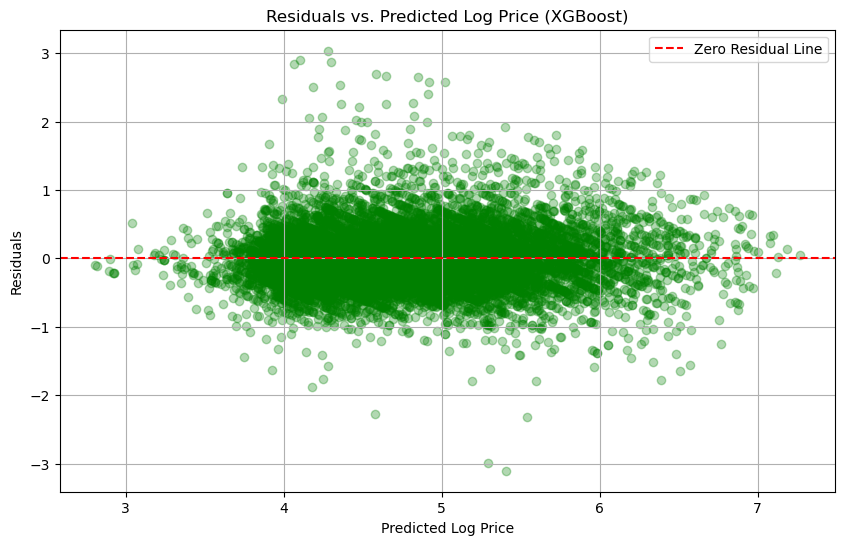


--- Example of Original Scale Price Predictions (XGBoost) ---
       Actual Price  Predicted Price (XGBoost)
4079           45.0                  54.494667
33735         140.0                 136.403702
69475         140.0                 116.125237
454           130.0                 250.125565
25153          39.0                  51.400520


In [31]:
# Importation of necessary modules for the computation of model evaluation metrics and for plotting functionalities.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# It is presupposed that the 'model_xgb', 'model_linear', and 'model_rf' objects
# alongside the `X_test`, `y_test`, and `X_train` datasets, are accessible from prior execution steps
# (i.e., from the "Model Development" section).

# --- Helper Function for Model Evaluation ---
def evaluate_model(model, X_test_data, y_test_data, model_name="Model"):
    """
    Evaluates a given machine learning model and prints common regression metrics.

    Args:
        model: The trained machine learning model.
        X_test_data (pd.DataFrame or np.array): The features of the test dataset.
        y_test_data (pd.Series or np.array): The true target values of the test dataset.
        model_name (str): A descriptive name for the model being evaluated.
    """
    print(f"\n--- Performance Metrics for {model_name} on Test Set ---")

    # 1. Prediction Generation
    y_pred = model.predict(X_test_data)

    # 2. Metric Calculation
    # RMSE (Root Mean Squared Error)
    rmse = np.sqrt(mean_squared_error(y_test_data, y_pred))
    print(f"Test RMSE: {rmse:.4f}")

    # MAE (Mean Absolute Error)
    mae = mean_absolute_error(y_test_data, y_pred)
    print(f"Test MAE: {mae:.4f}")

    # R-squared (Coefficient of Determination)
    r2 = r2_score(y_test_data, y_pred)
    print(f"Test R-squared: {r2:.4f}")

    return {'Model': model_name, 'RMSE': rmse, 'MAE': mae, 'R-squared': r2, 'y_pred': y_pred}

# --- 1. Evaluate All Trained Models ---
# Store evaluation results for comparison
evaluation_results = []

# Evaluate XGBoost Model
xgb_results = evaluate_model(model_xgb, X_test, y_test, "XGBoost Regressor")
evaluation_results.append(xgb_results)

# Evaluate Linear Regression Model
linear_results = evaluate_model(model_linear, X_test, y_test, "Linear Regression")
evaluation_results.append(linear_results)

# Evaluate Random Forest Regressor Model
rf_results = evaluate_model(model_rf, X_test, y_test, "Random Forest Regressor")
evaluation_results.append(rf_results)

# --- 2. Comparative Summary of Model Performance ---
print("\n--- Comparative Summary of Model Performance on Test Set ---")
metrics_df = pd.DataFrame(evaluation_results).set_index('Model')
print(metrics_df[['RMSE', 'MAE', 'R-squared']].round(4))

# --- 3. Feature Importance Analysis ---
print("\n--- Feature Importance Analysis ---")

# Feature importance for XGBoost Regressor
if hasattr(model_xgb, 'feature_importances_'):
    feature_importances_xgb = pd.Series(model_xgb.feature_importances_, index=X_train.columns)
    sorted_importances_xgb = feature_importances_xgb.sort_values(ascending=False)
    print("\nTop 10 Feature Importances (XGBoost Regressor):")
    print(sorted_importances_xgb.head(10))

    plt.figure(figsize=(12, 7))
    sns.barplot(x=sorted_importances_xgb.head(10).values,
                y=sorted_importances_xgb.head(10).index, palette='viridis')
    plt.title('Top 10 Feature Importances for Airbnb Log Price Prediction (XGBoost)')
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Feature')
    plt.show()

# Feature coefficients for Linear Regression
if hasattr(model_linear, 'coef_'):
    feature_coefficients_linear = pd.Series(model_linear.coef_, index=X_train.columns)
    # Sort by absolute value to see most impactful features, regardless of direction
    sorted_coefficients_linear = feature_coefficients_linear.abs().sort_values(ascending=False)
    print("\nTop 10 Absolute Feature Coefficients (Linear Regression):")
    print(feature_coefficients_linear.loc[sorted_coefficients_linear.head(10).index])

    plt.figure(figsize=(12, 7))
    sns.barplot(x=feature_coefficients_linear.loc[sorted_coefficients_linear.head(10).index].values,
                y=feature_coefficients_linear.loc[sorted_coefficients_linear.head(10).index].index, palette='coolwarm')
    plt.title('Top 10 Feature Coefficients for Airbnb Log Price Prediction (Linear Regression)')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.show()

# Feature importance for Random Forest Regressor
if hasattr(model_rf, 'feature_importances_'):
    feature_importances_rf = pd.Series(model_rf.feature_importances_, index=X_train.columns)
    sorted_importances_rf = feature_importances_rf.sort_values(ascending=False)
    print("\nTop 10 Feature Importances (Random Forest Regressor):")
    print(sorted_importances_rf.head(10))

    plt.figure(figsize=(12, 7))
    sns.barplot(x=sorted_importances_rf.head(10).values,
                y=sorted_importances_rf.head(10).index, palette='plasma') # Using 'plasma' palette for RF importances
    plt.title('Top 10 Feature Importances for Airbnb Log Price Prediction (Random Forest)')
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Feature')
    plt.show()

# --- 4. Visualization of Predicted vs. Actual Values (for XGBoost as an example) ---
# I'll use the y_test_pred from the XGBoost model for this visualization.
y_test_pred_xgb = xgb_results['y_pred']

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_xgb, alpha=0.3, color='blue', label='Predicted vs Actual (XGBoost)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction Line')
plt.xlabel('Actual Log Price')
plt.ylabel('Predicted Log Price')
plt.title('Actual vs Predicted Airbnb Log Prices (XGBoost Test Set)')
plt.legend()
plt.grid(True)
plt.show()

# --- 5. Residual Analysis (for XGBoost as an example) ---
# Term: Residuals - The difference between the actual observed values and the predicted values.
# Explanation: Plotting residuals against predicted values helps identify if the model has a systematic bias
# (e.g., consistently over- or under-predicting in certain ranges) or if the variance of errors changes across predictions.
# Ideally, residuals should be randomly scattered around zero with no discernible pattern.

residuals_xgb = y_test - y_test_pred_xgb

plt.figure(figsize=(10, 6))
sns.histplot(residuals_xgb, kde=True, color='purple')
plt.title('Distribution of Residuals (XGBoost)')
plt.xlabel('Residuals (Actual Log Price - Predicted Log Price)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred_xgb, residuals_xgb, alpha=0.3, color='green')
plt.axhline(y=0, color='r', linestyle='--', label='Zero Residual Line')
plt.title('Residuals vs. Predicted Log Price (XGBoost)')
plt.xlabel('Predicted Log Price')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()

# --- 6. Conversion of Log Price Predictions to Original Price Scale ---
# Explanation: Given that the target variable was `log_price`, it is imperative to revert the prognosticated values
# to their original monetary scale. This conversion is requisite to render the predictions interpretable and actionable
# for Airbnb hosts. This is demonstrated for the XGBoost model's predictions.

y_test_pred_original_scale_xgb = np.exp(y_test_pred_xgb)
y_test_original_scale = np.exp(y_test)

print("\n--- Example of Original Scale Price Predictions (XGBoost) ---")
# Displaying a few examples to show the actual and predicted prices in their original currency.
# Convert NumPy arrays to pandas Series to use the .head() method, ensuring index alignment for display.
example_df = pd.DataFrame({
    'Actual Price': pd.Series(y_test_original_scale, index=y_test.index).head(),
    'Predicted Price (XGBoost)': pd.Series(y_test_pred_original_scale_xgb, index=y_test.index).head()
})
print(example_df)

# Video LInk

https://drive.google.com/file/d/1QLO3T2zCopu3SSIUP1Iiw0Y9k7mxBtP0/view?usp=drivesdk